In [83]:
import numpy as np

In [46]:
# 数据集
data = np.array([
    [152, 451.15],
    [142, 425.88],
    [64, 191.17],
    [156, 473.64],
    [121, 369.33],
    [70, 215.18],
    [152, 474.62],
    [171, 532.39],
    [124, 351.61],
    [137, 421.03]
])

# 特征和标签
features = data[:, 0]  # 房间数量
target = data[:, 1]  # 房价

In [84]:
multi_features = np.array([[37.45, 95.07, 73.20, 59.87],
                           [15.60, 15.60,  5.81, 86.62],
                           [60.11, 70.81,  2.06, 96.99],
                           [83.24, 21.23, 18.18, 18.34],
                           [38.34,  8.87, 24.93, 27.51],
                           [ 2.56, 88.37,  5.37, 70.63],
                           [ 5.32, 66.62, 19.47, 95.33],
                           [90.26, 89.03, 78.06,  6.33],
                           [20.20, 45.83,  7.09, 81.75],
                           [94.79, 68.87, 36.43, 88.37]])
multi_target = np.array(
    [262.67, 63.14, 269.22, 43.11, 54.53, 232.54, 94.41, 396.47, 148.43, 259.72])

In [85]:
def compute_cost(x, y, w, b):
    predictions = np.dot(x, w) + b
    errors = predictions - y
    cost_result = np.mean(errors ** 2) / 2
    return cost_result

In [86]:
# 初始化参数
weight = np.zeros(multi_features.shape[1])
bias = 0.0

# 计算成本
cost = compute_cost(multi_features, multi_target, weight, bias)
print(f"Initial cost: {cost:.2f}")

Initial cost: 22997.80


In [87]:
def gradient_descent(x, y, w, b, lr, ni):
    m = len(x)
    for iteration in range(ni):
        # 计算预测值
        predictions = np.dot(x, w) + b

        # 计算误差
        errors = predictions - y

        # 计算梯度
        dw = np.dot(errors, x) / m
        db = np.sum(errors) / m

        # 更新参数
        w -= lr * dw
        b -= lr * db

        # 输出调试信息
        if iteration % 100 == 0:
            c = compute_cost(x, y, w, b)
            print(f"Iteration {iteration}: Cost {c:.2f}, w {[f'{val:.2f}' for val in w]}, b {b:.2f}")

    return w, b

# 超参数
learning_rate = 0.0001
num_iterations = 1000

# 执行梯度下降
weight, bias = gradient_descent(multi_features, multi_target, weight, bias, learning_rate, num_iterations)
print(f"Optimized weights: {np.array2string(weight, 
                                            formatter={'float_kind':lambda x: f'{x:.2f}'})}")
print(f"Optimized b: {bias:.2f}")

# 计算优化后的成本
optimized_cost = compute_cost(multi_features, multi_target, weight, bias)
print(f"Optimized cost: {optimized_cost:.2f}")

Iteration 0: Cost 2644.34, w ['0.97', '1.33', '0.67', '1.13'], b 0.02
Iteration 100: Cost 1024.54, w ['0.90', '2.88', '0.10', '-0.35'], b -0.02
Iteration 200: Cost 1015.43, w ['0.95', '3.03', '-0.11', '-0.43'], b -0.05
Iteration 300: Cost 1015.15, w ['0.95', '3.05', '-0.14', '-0.44'], b -0.07
Iteration 400: Cost 1015.09, w ['0.96', '3.05', '-0.15', '-0.44'], b -0.09
Iteration 500: Cost 1015.03, w ['0.96', '3.05', '-0.15', '-0.44'], b -0.12
Iteration 600: Cost 1014.98, w ['0.96', '3.05', '-0.15', '-0.44'], b -0.14
Iteration 700: Cost 1014.92, w ['0.96', '3.05', '-0.15', '-0.44'], b -0.16
Iteration 800: Cost 1014.87, w ['0.96', '3.05', '-0.15', '-0.44'], b -0.19
Iteration 900: Cost 1014.81, w ['0.96', '3.05', '-0.15', '-0.44'], b -0.21
Optimized weights: [0.96 3.05 -0.15 -0.44]
Optimized b: -0.23
Optimized cost: 1014.76


In [88]:
import matplotlib.pyplot as plt

In [ ]:
# 绘制数据点
plt.scatter(features, target, color='blue', label='Data')

# 绘制拟合线
plt.plot(features, weight * features + bias, color='red', label='Fit Line')

plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.legend()
plt.show()

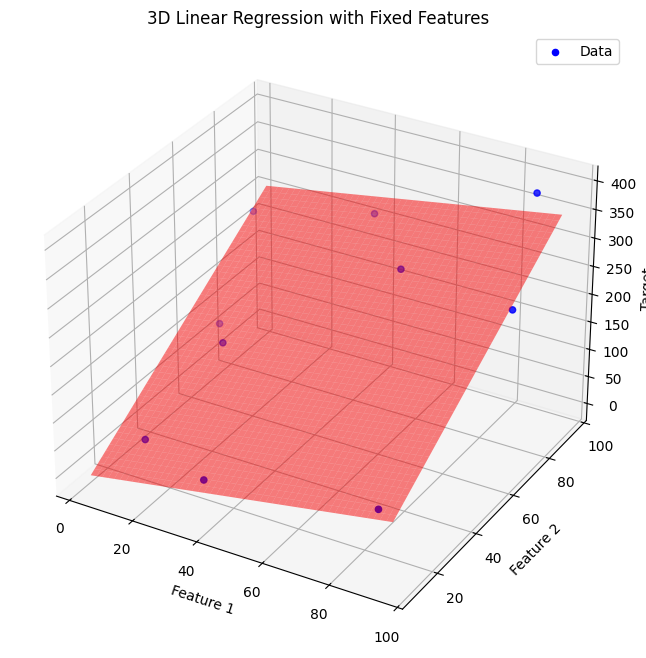

In [89]:
# 提取前两个特征
x1 = multi_features[:, 0]
x2 = multi_features[:, 1]
X_fixed = np.c_[x1, x2]

# 固定其他特征的值
fixed_feature_3 = np.mean(multi_features[:, 2])
fixed_feature_4 = np.mean(multi_features[:, 3])

# 生成网格数据
x1_range = np.linspace(min(x1), max(x1), 50)
x2_range = np.linspace(min(x2), max(x2), 50)
X1, X2 = np.meshgrid(x1_range, x2_range)

# 生成预测数据
X1_flat = X1.flatten()
X2_flat = X2.flatten()
X_fixed_mesh = np.c_[X1_flat, X2_flat]
X_fixed_full = np.c_[X_fixed_mesh, np.full_like(X1_flat, fixed_feature_3), np.full_like(X1_flat, fixed_feature_4)]
predictions_show = np.dot(X_fixed_full, weight) + bias

# 绘制
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(x1, x2, multi_target, color='blue', label='Data')

# 绘制回归平面
predictions_grid = predictions_show.reshape(X1.shape)
ax.plot_surface(X1, X2, predictions_grid, color='red', alpha=0.5)

# 标签
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Linear Regression with Fixed Features')

plt.legend()
plt.show()